Lending Club Case Study

Group Members
    -- Manas Ranjan Das
    -- Palak Kour

Business Problem Statement

A consumer finance company, is one of the largest online loan marketplace, facilitating personal loans, business loans, 
and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
When the company receives a loan application, the company must decide for loan approval based on the applicant’s profile.
    -- 
   -- --      

In [2]:
# Importing necessary python liberaries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
%matplotlib inline


In [3]:
# Reading the data from Loan source file
loan = pd.read_csv('Downloads\loan.csv',encoding='ISO-8859-1',low_memory=False)

In [4]:
#Overviewing top 5 rows with head command
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Find out the dataset shape and information
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [6]:
#prints information about the loan DataFrame.This contains the number of columns, column labels, column data types, memory usage, 
#range index, and the number of cells in each column (non-null values)
loan.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [7]:
#Shape of a given loan dataset
loan.shape

(39717, 111)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
#DATA CleanUP
#we find some columns have missing values.Hence we analyze it to decide whether to keep them or drop them
#We will perform cleanup of NULLs from rows and columns associated with the loan dataframe
#In the histogram above, X-axis represents number of NULL valus and Y-axis represents the number of columns.
#We observe a spike near 40000 mark. The total number records in our datast is 39717. We want to drop columns having all NULL values.  

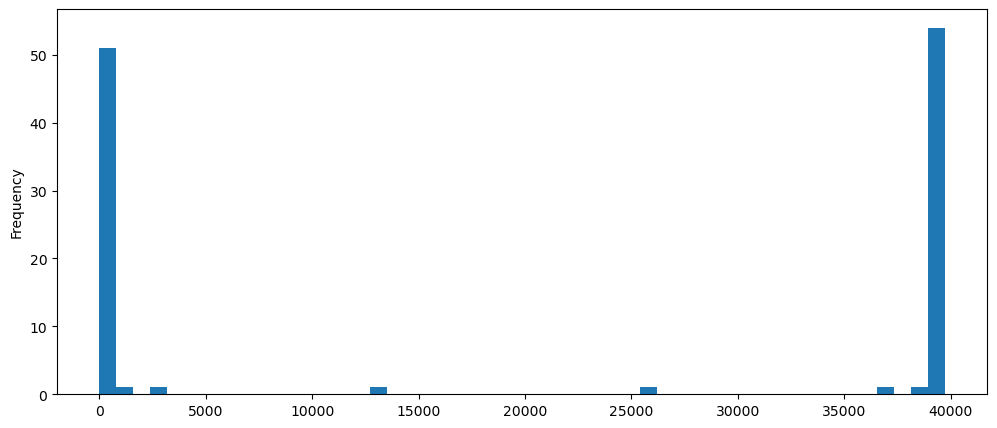

In [10]:
subloan = loan.isnull().sum()
subloan
subloan.plot(kind='hist', bins=50, figsize = (12,5))
plt.show()

In [11]:
subloan.loc[(subloan.values > 10000) & (subloan.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [12]:
#Dropping columns with more than 10,000 null values
loan.drop(columns=list(subloan[subloan.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

In [13]:
#find unique column
unique_column = loan.nunique()
print(unique_column)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [14]:
#drop columns with unique value as there will be no use on imapct calculation
loan.drop( columns = list(unique_column[unique_column.values == 1].index), inplace = True)
loan.shape

(39717, 44)

In [15]:
# removal of derived column after loan approval and not necessary for our analysis
delete_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=delete_cols, inplace=True)
loan.shape

(39717, 28)

In [16]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


In [17]:
#Data preparation
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [18]:
#loan_status with "Current" status doesnt give any benefits towards analysis for approving or rejecting application. 
#These records can be removed.
loan = loan[~(loan['loan_status'] == 'Current')]

In [19]:
#Data count after cleanup of unused current column
loan.shape

(38577, 28)

In [20]:
#int_rate column validation
loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [21]:
#remove % from int_rate as string will not help for calculation
#convert into float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

<Axes: >

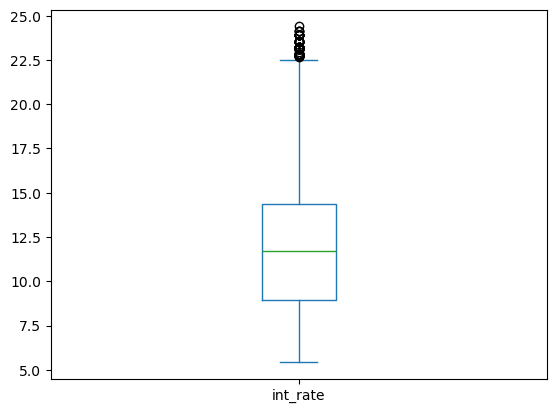

In [22]:
#find Outliers
loan['int_rate'].plot.box()

In [23]:
#validate term column by removing months
loan['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [24]:
#remove months from term column for calculation purpose
loan['term_months'] = loan['term'].apply(lambda x: pd.to_numeric(x.split(" ")[1]))
loan['term_months'].value_counts()

term_months
36    29096
60     9481
Name: count, dtype: int64

In [25]:
#delete the term columns after removal of Months from values
loan.drop(columns='term', inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_months
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,...,0,Jan-85,1,3,0,13648,83.70%,9,0.0,36
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,0,Apr-99,5,3,0,1687,9.40%,4,0.0,60
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,...,0,Nov-01,2,2,0,2956,98.50%,10,0.0,36
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,0,Feb-96,1,10,0,5598,21%,37,0.0,36
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,0,Nov-04,3,9,0,7963,28.30%,12,0.0,36


In [26]:
#validate issue_id column
loan['issue_d'].value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [27]:
#remove '-' from issue_d as string will not help for calculation
#create two new columns after split to ( Month and Year)
loan['issue_mn'] = loan['issue_d'].apply(lambda x: x.split("-")[0])
loan['issue_mn'].value_counts()

issue_mn
Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: count, dtype: int64

In [28]:
loan['issue_yr'] = loan['issue_d'].apply(lambda x: pd.to_numeric(x.split("-")[1]))
loan['issue_yr'].value_counts()

issue_yr
11    20516
10    11532
9      4716
8      1562
7       251
Name: count, dtype: int64

In [29]:
#drop issue_d column
loan.drop(columns=['issue_d'], inplace=True)

In [30]:
#read the data from latest refreshed data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_months,issue_mn,issue_yr
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,...,1,3,0,13648,83.70%,9,0.0,36,Dec,11
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,5,3,0,1687,9.40%,4,0.0,60,Dec,11
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,...,2,2,0,2956,98.50%,10,0.0,36,Dec,11
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,1,10,0,5598,21%,37,0.0,36,Dec,11
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,3,9,0,7963,28.30%,12,0.0,36,Dec,11


In [31]:
#validate title column and see if it is important for analysis or can be removed
loan['title'].value_counts()

title
Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: count, Length: 19297, dtype: int64

In [32]:
loan['title'].sample(10)

21601                       Medical
39299           Going to the chapel
1795                    Myreduction
34604                 Personal Loan
13907             Car Consolidation
12623            debt consolidation
2726        Debt Consolidation Loan
39625    Consolidate and lower rate
35941               Engagement Ring
14475                     New Start
Name: title, dtype: object

In [33]:
#It seems this column has so many unique values and this does not seem to be useful for analysis. hence, we are deleting this column
loan.drop(columns=['title'], inplace=True)

In [34]:
#validate on earliest_cr_line
loan['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [35]:
loan['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [36]:
#We observe data format inconsistencies. Sometimes it has MMM-YY and at other times it has YY-MMM. 
#Also, the year is a 2 digit and not Y2K corrected. Hence we need to correct the data

from datetime import datetime
today = datetime.today()
today.year


2024

In [37]:
def days_from_earliest_cr_line (date):
    mn, yr = date.split('-')
    if yr in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        yr, mn = d.split('-')
    yr = 2000 + int(yr)
    if yr > today.year:
        yr -= 100
    earliest_cr_line = datetime.strptime(str(yr)+'-'+mn+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Jan-20")

1665

In [38]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].value_counts()

days_from_earliest_cr_line
9062     360
9396     357
8696     341
9366     340
9731     318
        ... 
21449      1
18800      1
5774       1
22880      1
18193      1
Name: count, Length: 524, dtype: int64

In [39]:
#drop column earliest_cr_line
loan.drop(columns=['earliest_cr_line'], inplace=True)
loan.shape

(38577, 28)

In [40]:
#validate revol_bal as it contains %
loan['revol_util'].value_counts()
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].head()


0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [41]:
#percentage of loans paid vs charged off
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

In [42]:
##Univariate Analysis
## We will validate the corelation between the different numeric attributes (with high correlation value)

In [43]:
# Creating new loan_status_number numeric attribute. We assign 1 for defaulted loans and 0 for paid off 
loan['loan_status_number'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [44]:
loan['loan_status_number'].value_counts()
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_months,issue_mn,issue_yr,days_from_earliest_cr_line,loan_status_number
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,...,0,13648,83.7,9,0.0,36,Dec,11,14448,0
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,0,1687,9.4,4,0.0,60,Dec,11,9245,1
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,...,0,2956,98.5,10,0.0,36,Dec,11,8300,0
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,0,5598,21.0,37,0.0,36,Dec,11,10400,0
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,0,7963,28.3,12,0.0,36,Dec,11,7204,0


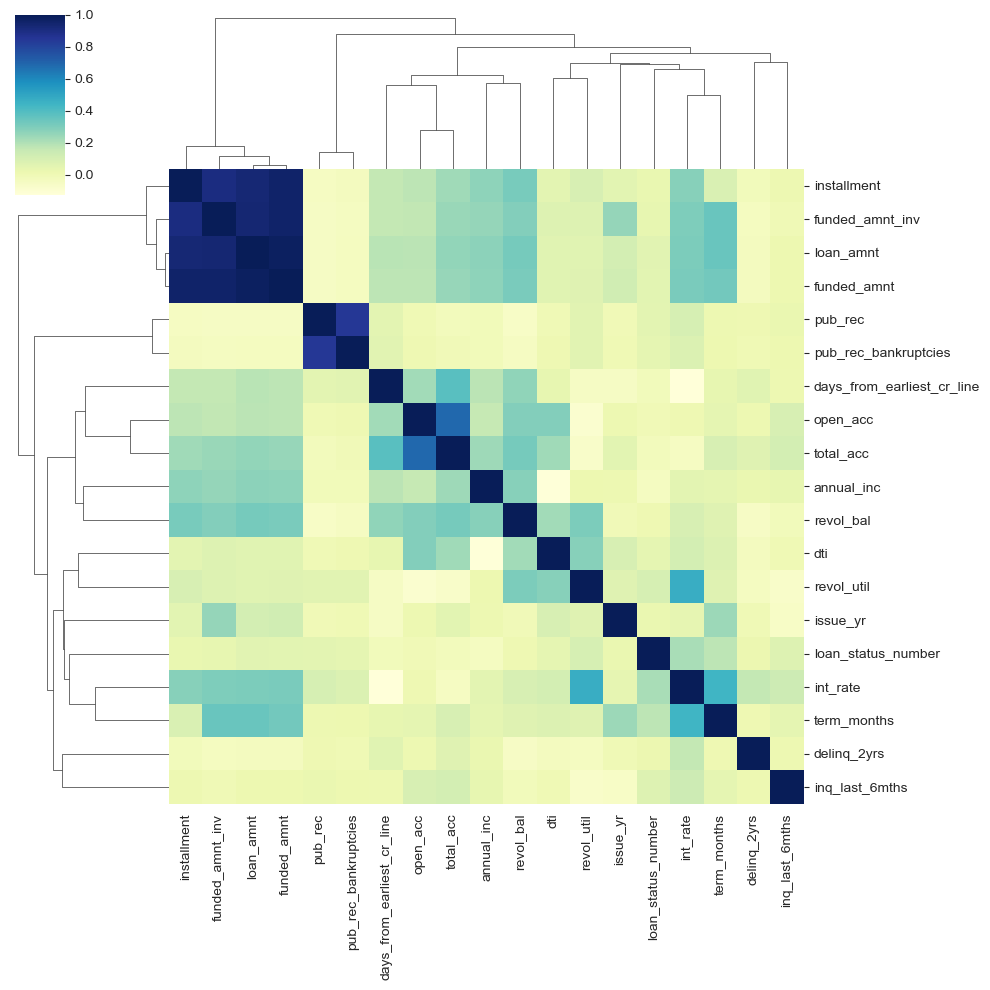

In [45]:
sns.set_style("whitegrid")
loan.corr(method='pearson', numeric_only=True)
sns.clustermap(data=loan.corr(method='pearson', numeric_only=True), cmap='YlGnBu', figsize=(10,10))
plt.show()
#As darker shades indicate heigher correlation , we infer that loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation
#These fields are proportional to each other. 
#Also the public records related fields pub_rec, pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

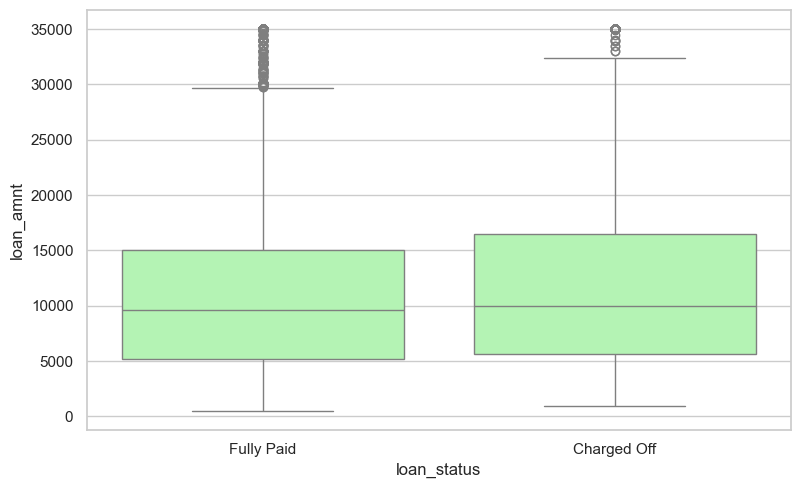

In [46]:
# Boxplot find the loan_status against loan_amnt 
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [47]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

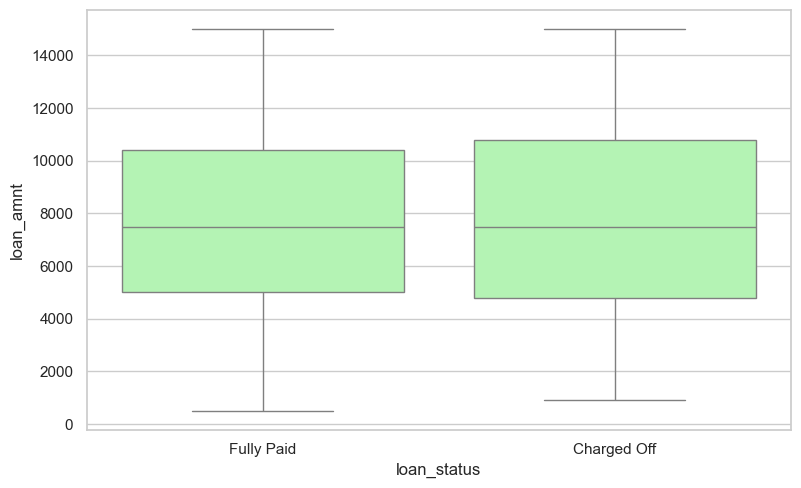

In [48]:
# as there is difference between mean and std, we are considering 75% as limit
loan_t75 = loan.loc[(loan['loan_amnt']<=15000)]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_t75)
plt.show()

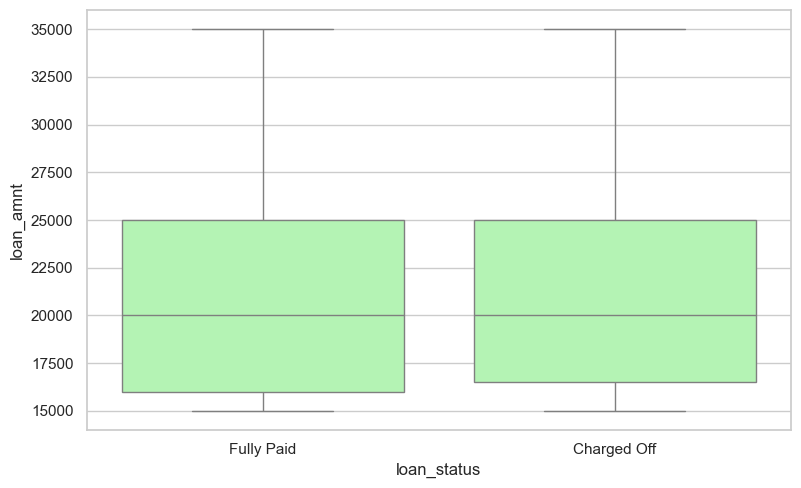

In [49]:
loan_a75 = loan.loc[(loan['loan_amnt']>=15000)]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_a75)
plt.show()
# Observation: if we compare both the trends that higher the loan amount, the chances of Charged Off is more

In [50]:
#Funcation to find the percentile by creating columns for univariate validation
def PercentileC (*, data=loan, column, trailer=''):
    """
        Function Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [51]:
#Funcation to find the percentile by creating columns for univariate categorical validation
def Univariate_Categorical (*, data=loan, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

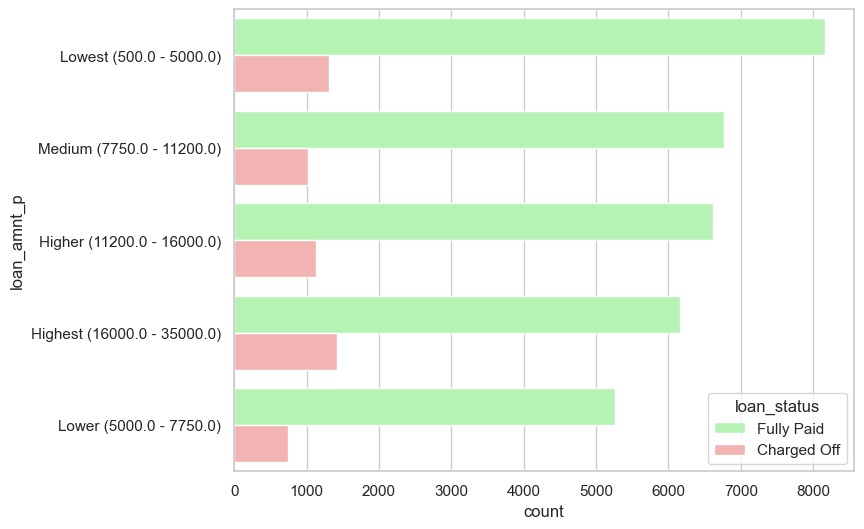

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [52]:
PercentileC(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')
#Observation: We observe that higher is the loan amount, the greater is the chance of loan default

In [53]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_months,issue_mn,issue_yr,days_from_earliest_cr_line,loan_status_number,loan_amnt_p
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,...,13648,83.7,9,0.0,36,Dec,11,14448,0,Lowest (500.0 - 5000.0)
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,1687,9.4,4,0.0,60,Dec,11,9245,1,Lowest (500.0 - 5000.0)
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,...,2956,98.5,10,0.0,36,Dec,11,8300,0,Lowest (500.0 - 5000.0)
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,5598,21.0,37,0.0,36,Dec,11,10400,0,Medium (7750.0 - 11200.0)
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,7963,28.3,12,0.0,36,Dec,11,7204,0,Lowest (500.0 - 5000.0)


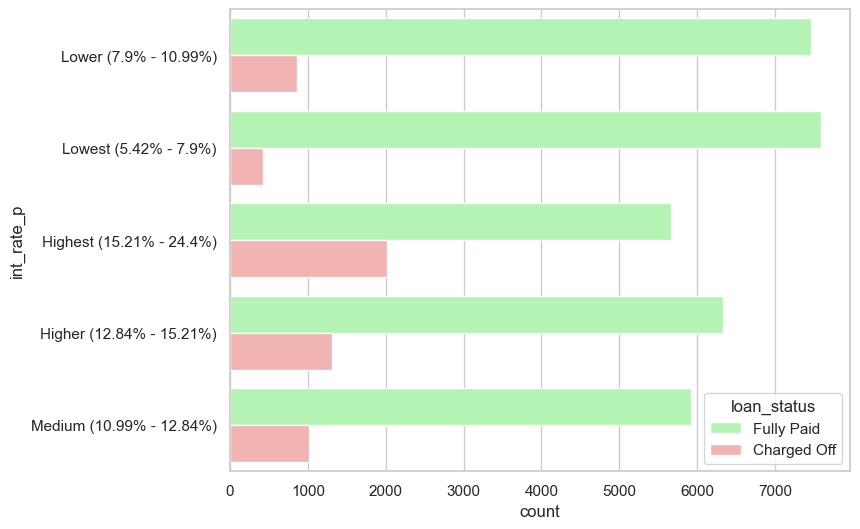

int_rate_p,Charged off %,Record count
Highest (15.21% - 24.4%),0.262150,7675
Higher (12.84% - 15.21%),0.171619,7639
Medium (10.99% - 12.84%),0.146995,6939
Lower (7.9% - 10.99%),0.102876,8311
Lowest (5.42% - 7.9%),0.053538,8013


In [54]:
PercentileC(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')
# Observation: We observed that higher is the interest, the greater is the chance of loan default

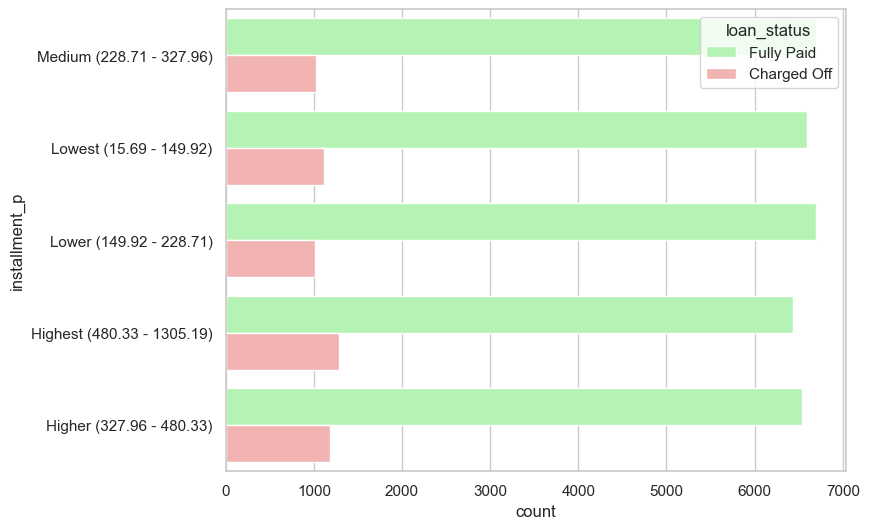

installment_p,Charged off %,Record count
Highest (480.33 - 1305.19),0.166321,7714
Higher (327.96 - 480.33),0.152988,7713
Lowest (15.69 - 149.92),0.145153,7716
Medium (228.71 - 327.96),0.132936,7718
Lower (149.92 - 228.71),0.131934,7716


In [55]:
PercentileC(column='installment')
Univariate_Categorical(column='installment_p')
# We find that higher installment amounts show higher default percentages.

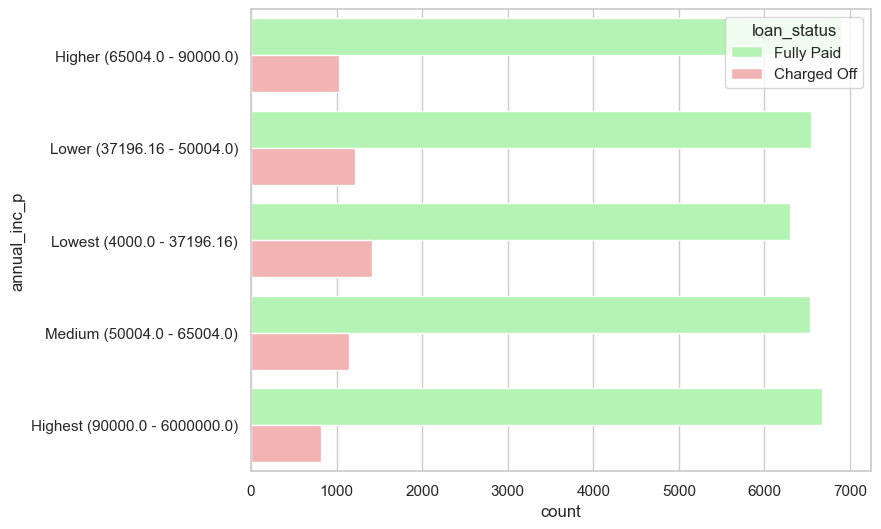

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37196.16),0.183126,7716
Lower (37196.16 - 50004.0),0.156926,7768
Medium (50004.0 - 65004.0),0.149629,7679
Higher (65004.0 - 90000.0),0.129651,7929
Highest (90000.0 - 6000000.0),0.109285,7485


In [56]:
PercentileC(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')
#Observation:  We find that higher annual income show lesser default percentages.

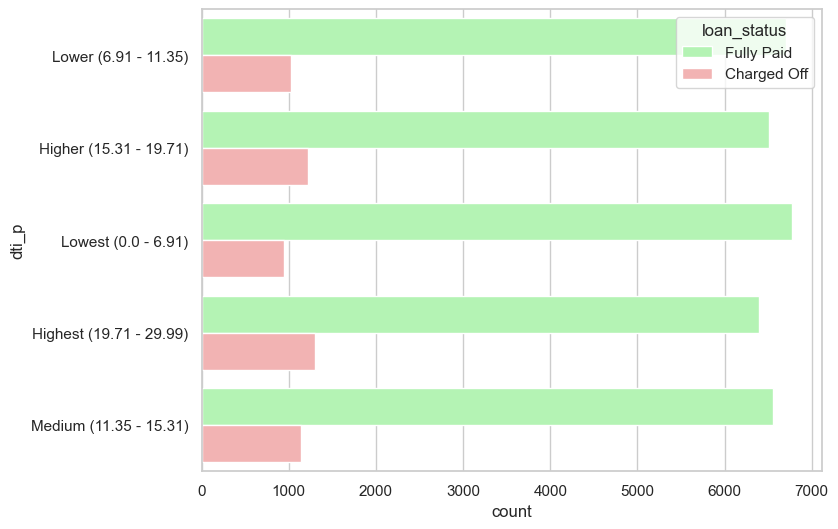

dti_p,Charged off %,Record count
Highest (19.71 - 29.99),0.168853,7699
Higher (15.31 - 19.71),0.157908,7726
Medium (11.35 - 15.31),0.147609,7696
Lower (6.91 - 11.35),0.132627,7736
Lowest (0.0 - 6.91),0.122409,7720


In [57]:
PercentileC(column='dti')
Univariate_Categorical(column='dti_p')
#Observation: We find that higher debt to income ratio show higher default percentages

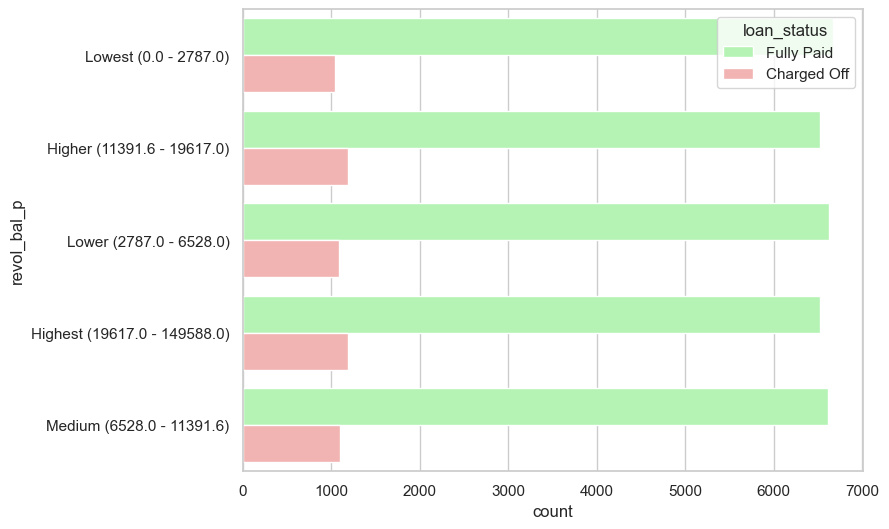

revol_bal_p,Charged off %,Record count
Highest (19617.0 - 149588.0),0.154913,7714
Higher (11391.6 - 19617.0),0.154335,7717
Medium (6528.0 - 11391.6),0.142894,7712
Lower (2787.0 - 6528.0),0.141283,7715
Lowest (0.0 - 2787.0),0.135898,7719


In [58]:
PercentileC(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')
#Observation: 
# We find that total credit revolving balances slightly influence the default percentage. 
#Higher the revolving balance, greater the chance of the loan getting defaulted.

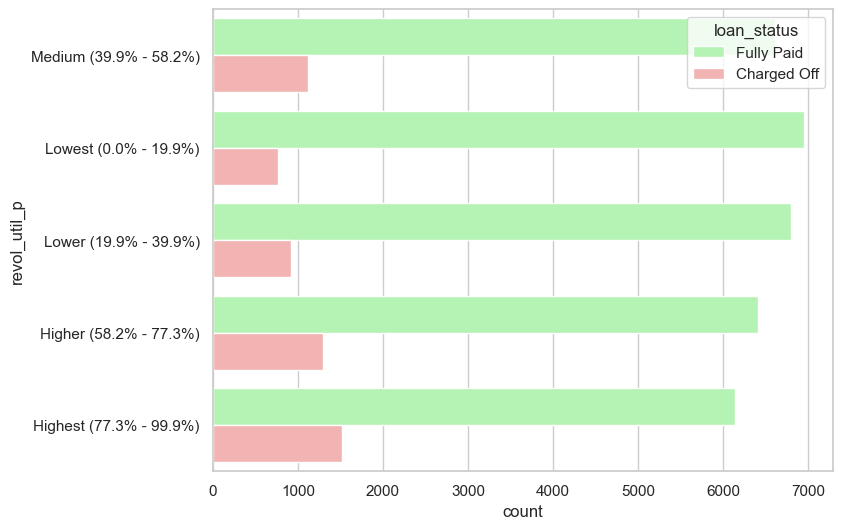

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.198069,7664
Higher (58.2% - 77.3%),0.167727,7703
Medium (39.9% - 58.2%),0.145001,7731
Lower (19.9% - 39.9%),0.118356,7714
Lowest (0.0% - 19.9%),0.099417,7715


In [62]:
PercentileC(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')
#observation:
# We observe that revolving line utilization rate has high impact to the loan default percentage. 
#When this increases, the charged off percentage also increases.

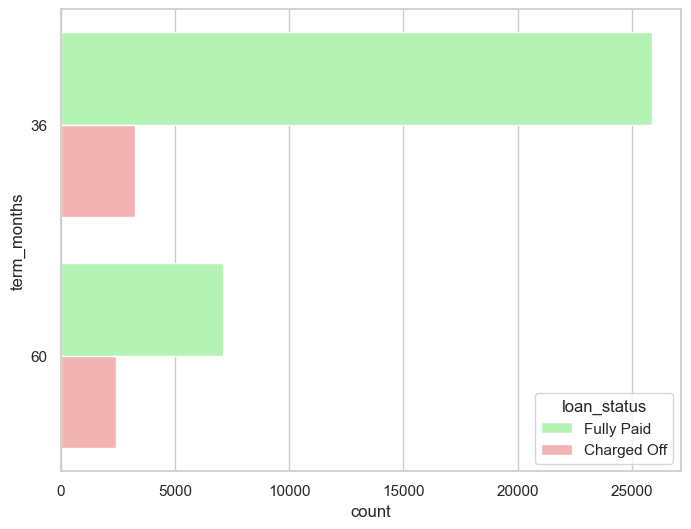

term_months,Charged off %,Record count
60,0.253138,9481
36,0.110909,29096


In [60]:
Univariate_Categorical(column='term_months')
#Observation: 
# For loans with 5 year repayment term, the default percent is 25%. 
# And for 3 year loan repayment term, the default is only for 11% of the cases. 
#Hence loan repayment term plays a factor in predicting the default rate.

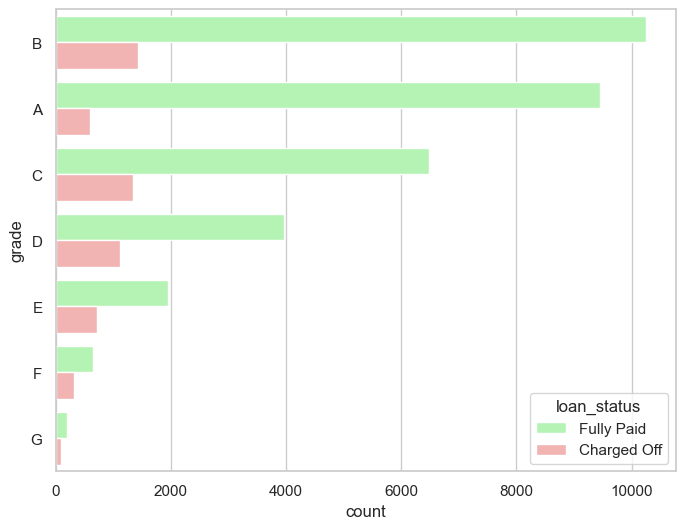

grade,Charged off %,Record count
G,0.337793,299
F,0.326844,976
E,0.268494,2663
D,0.219862,5085
C,0.171943,7834
B,0.122056,11675
A,0.059930,10045


In [61]:
Univariate_Categorical(column='grade')
#Observation: We observe that for  G, F, E and D form grades, the default rate is much higher than others.

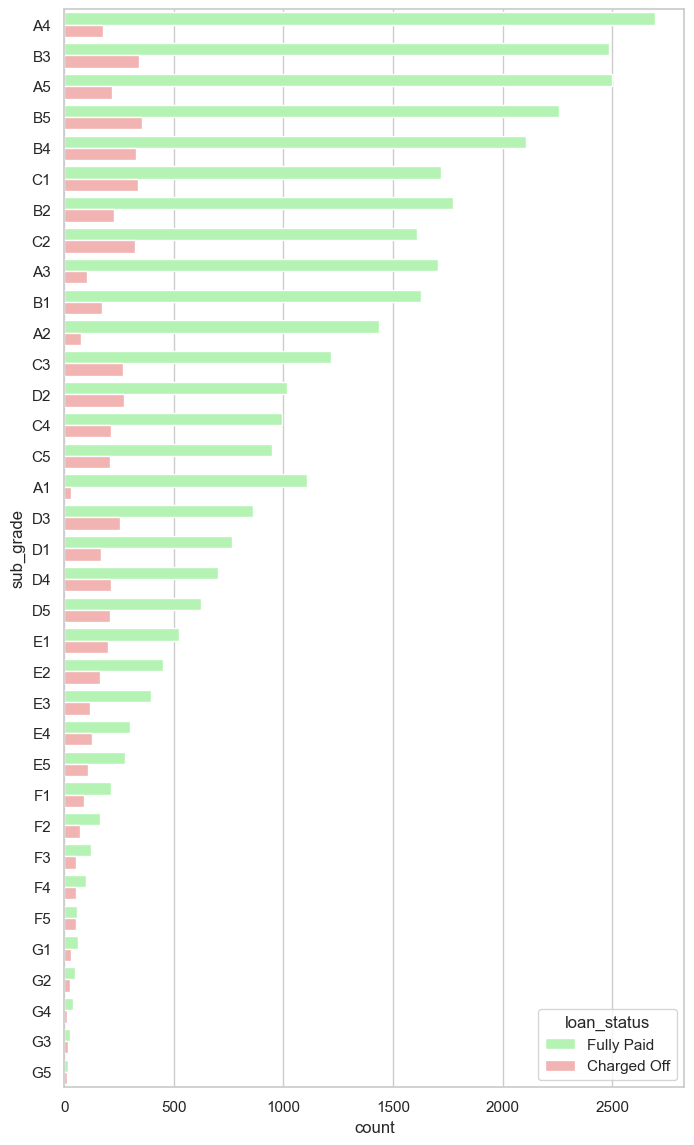

sub_grade,Charged off %,Record count
F5,0.477876,113
G3,0.422222,45
G2,0.363636,77
F4,0.350993,151
G5,0.344828,29
G1,0.329787,94
F2,0.300429,233
F1,0.298361,305
E4,0.297170,424
F3,0.293103,174


In [63]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))
#Observation:  We observe that the G3 and F5 sub grades have default rate greater than 40%. This field is a clear indicator of the default percent.

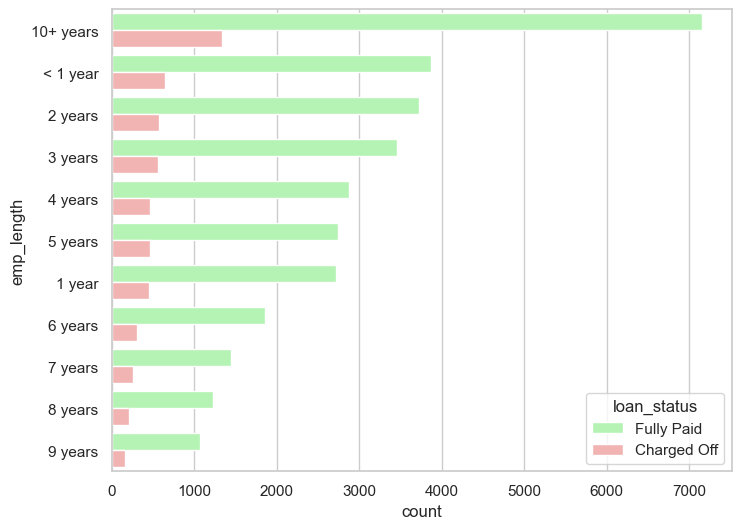

emp_length,Charged off %,Record count
10+ years,0.156810,8488
7 years,0.153711,1711
1 year,0.143894,3169
5 years,0.143394,3194
< 1 year,0.141748,4508
6 years,0.141605,2168
8 years,0.141463,1435
3 years,0.138335,4012
4 years,0.138241,3342
2 years,0.132137,4291


In [64]:
Univariate_Categorical(column='emp_length')
#Observation:  We are unable to infer any trend from this data

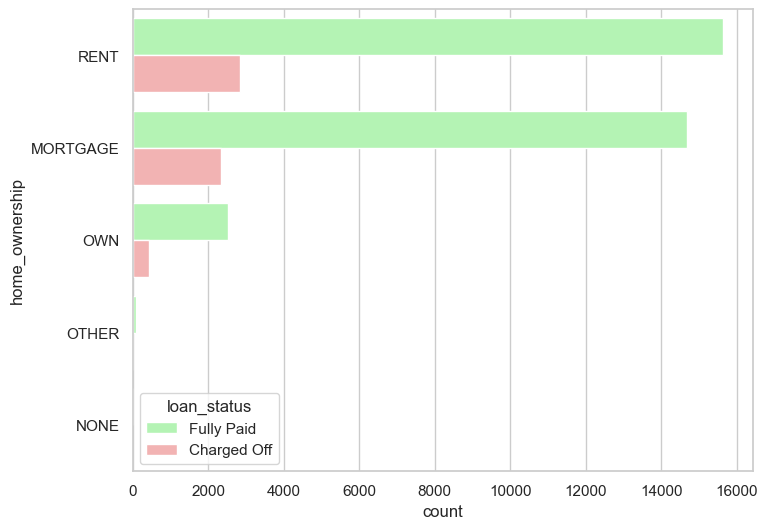

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153626,18480
OWN,0.148908,2975
MORTGAGE,0.136713,17021


In [65]:
Univariate_Categorical(column='home_ownership')
#Observation:  We are unable to infer any trend from this data

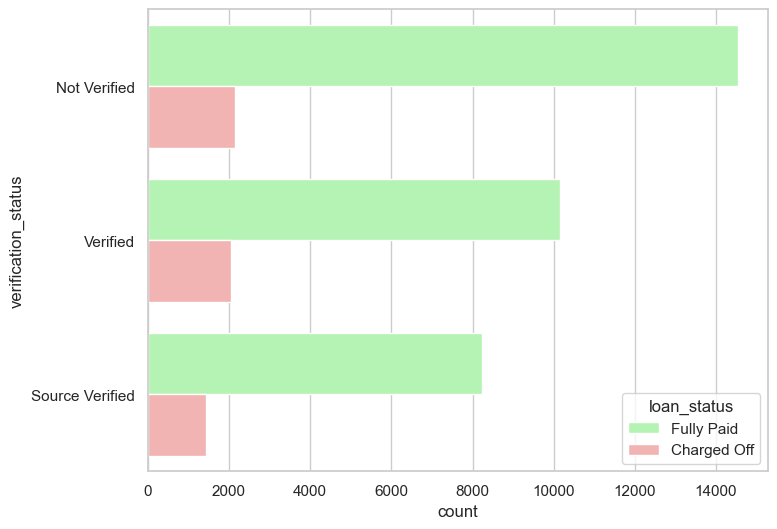

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [66]:
Univariate_Categorical(column='verification_status')
#Observation: We observe that Verified applicants have higher loan default percentage. Hence we infer that there is gap in the verification process

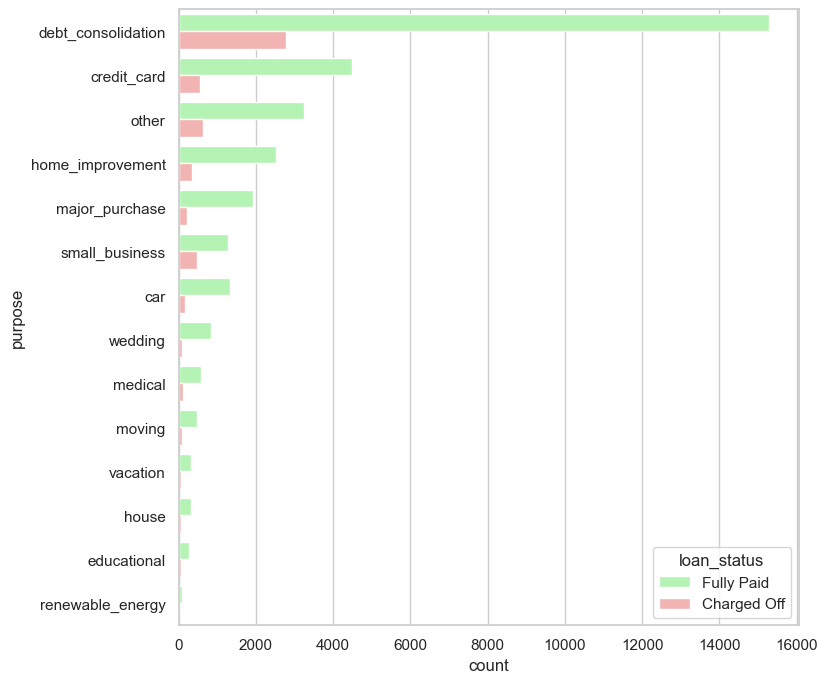

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [70]:
Univariate_Categorical(column='purpose', figsize=(8,8))
#Observation:  We observe that loans taken for small_business, renewable_energy and educational have higher risks associated with it in terms of loan default .

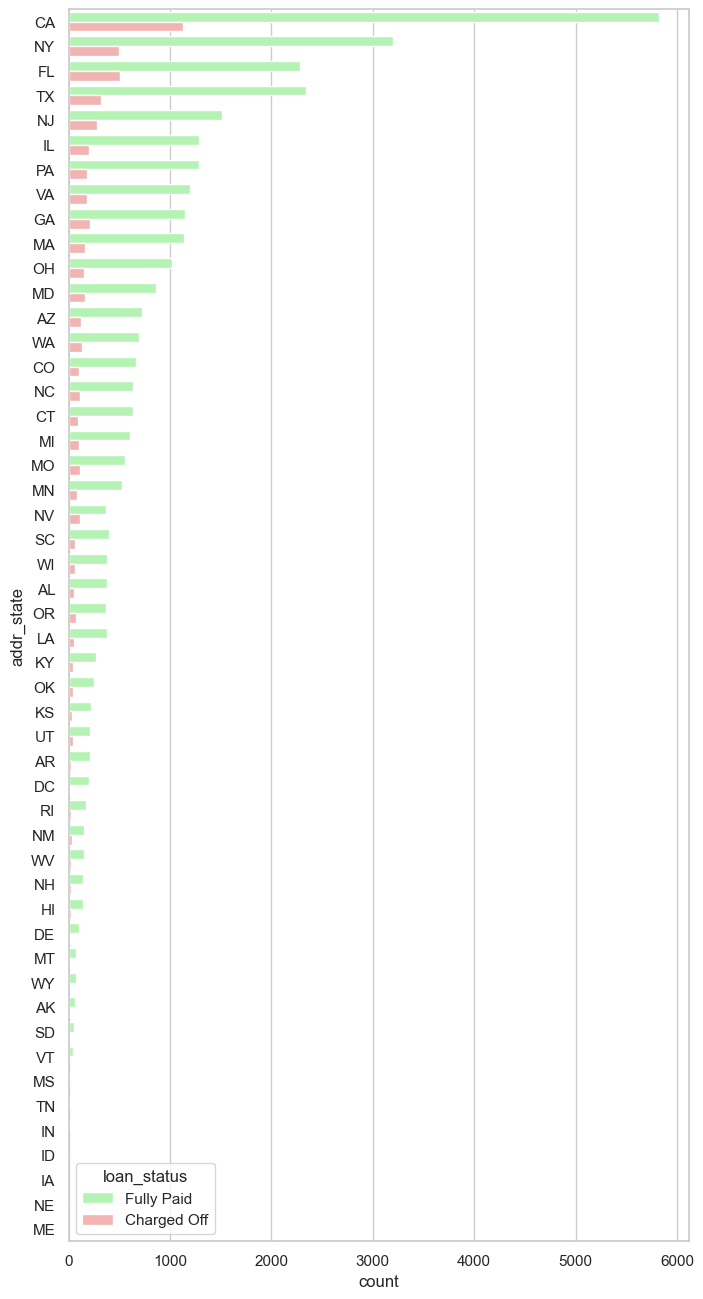

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225470,479
SD,0.193548,62
AK,0.192308,78
FL,0.181230,2781
MO,0.170149,670
HI,0.168675,166
ID,0.166667,6
NM,0.163934,183
OR,0.163218,435


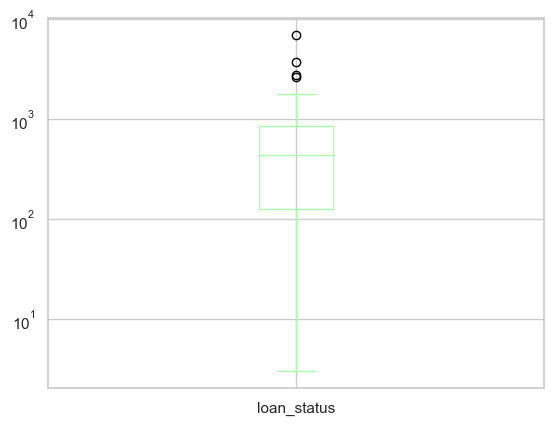

In [67]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)
#Observation:  We observe that NE, NV, SD, AK, FL, MO states show higher risks of loan default

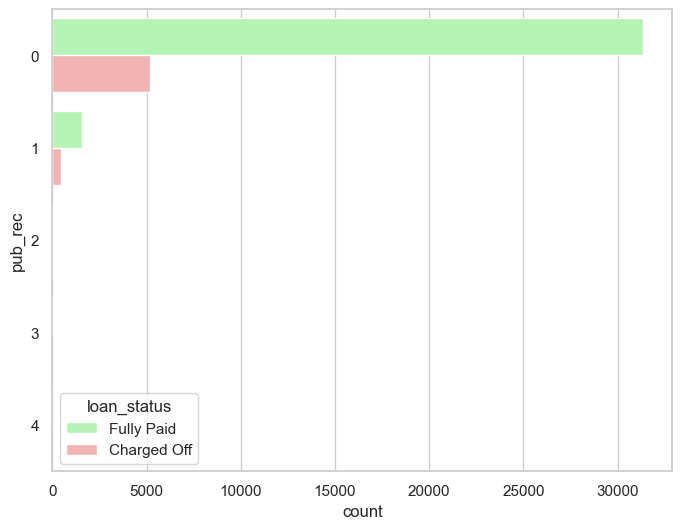

pub_rec,Charged off %,Record count
1,0.227024,2013
2,0.208333,48
0,0.141343,36507


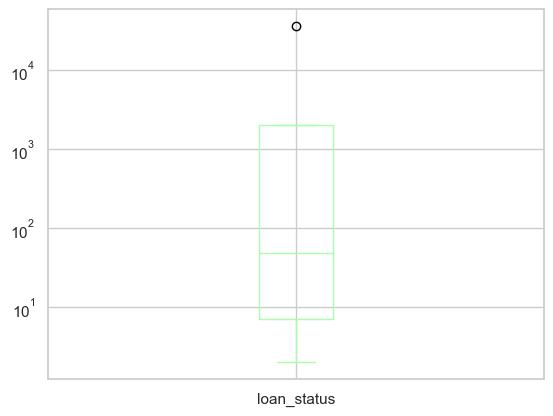

In [68]:
Univariate_Categorical(column='pub_rec', box_plot=True)
#Observation:  We observe that applicants with non-zero derogatory public records have greater chances of loan default

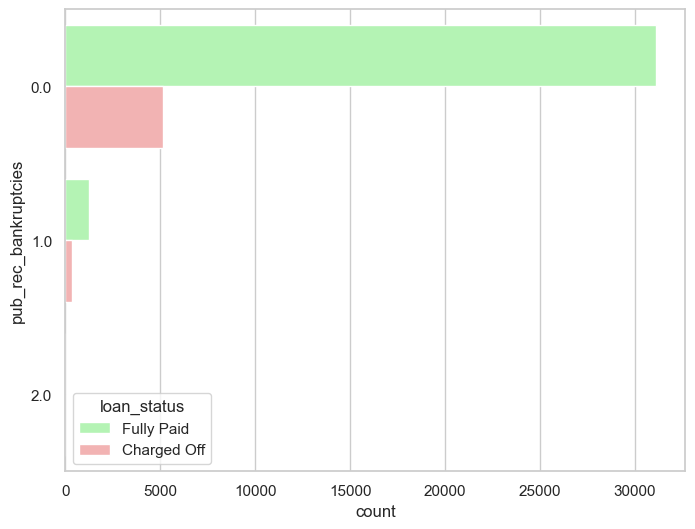

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.223580,1637
0.0,0.141868,36238


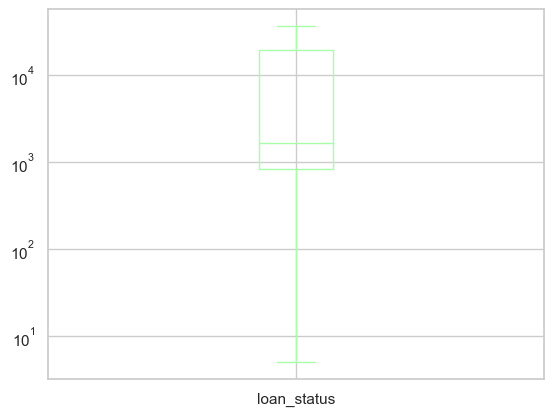

In [69]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)
#Observation: We observe that higher is the number of public bankruptcy records, greater is the chance of loan default.

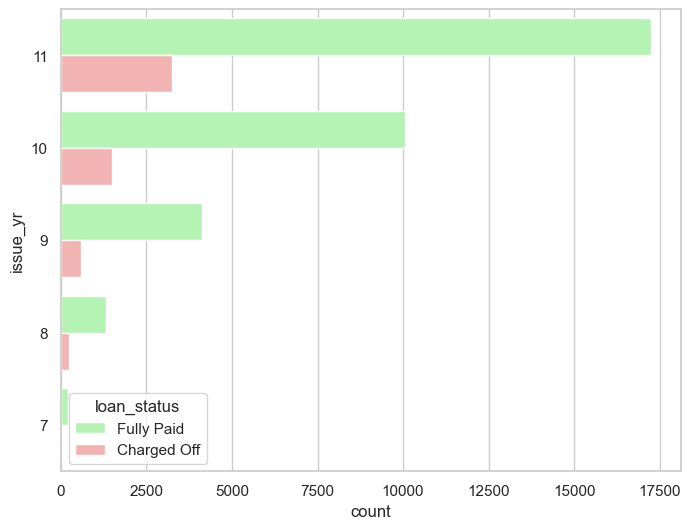

issue_yr,Charged off %,Record count
7,0.179283,251
11,0.158705,20516
8,0.158131,1562
10,0.128772,11532
9,0.125954,4716


In [73]:
Univariate_Categorical(column='issue_yr')
#Observation: there is no sync with data hence, it will not be helpful on validation

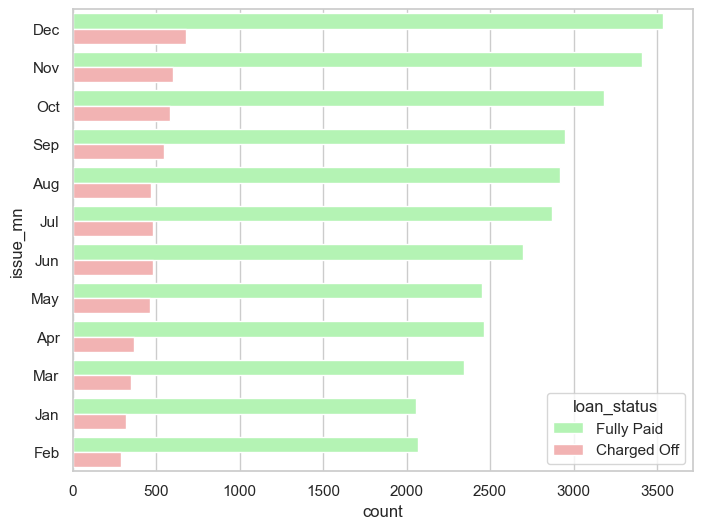

issue_mn,Charged off %,Record count
Dec,0.160854,4215
May,0.159644,2919
Sep,0.156375,3498
Oct,0.154214,3761
Jun,0.151887,3180
Nov,0.149276,4006
Jul,0.142942,3351
Aug,0.138135,3388
Jan,0.134931,2379
Apr,0.130696,2831


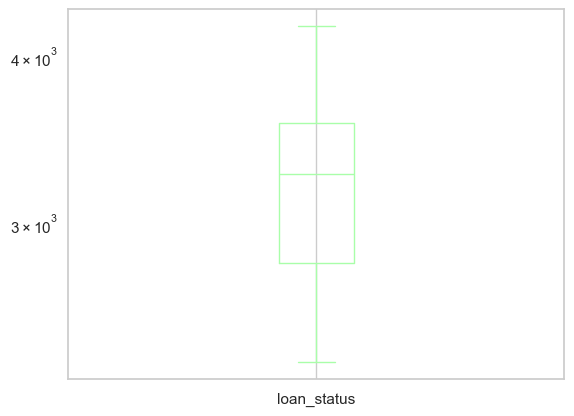

In [71]:
Univariate_Categorical(column='issue_mn', box_plot=True)
#Observation: 
# We observe that  the December month  has the highest number of loan applications per year and also the biggest default ratio.This is festive season. 
#Month of May is also another one, which is during the summer break and right before the Memorial day and Independence day breaks in US.

# Bivariate Analysis

In [72]:
#Now we will take group of variables together and analyze their combined effect on the loan-status. 
#These categories are based on our business understanding. 
def Bivariate_Analysis (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Function Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, creates violin plot
    """
#fig, ax = plt.subplots(figsize=figsize)
 #   sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
  #                 ax=ax, hue_order=order)
   # if title is not None:
    #    plt.title(title)
    #plt.show()

    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, ax=ax, split = True,
                  hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [73]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Function Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, creates heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_number', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

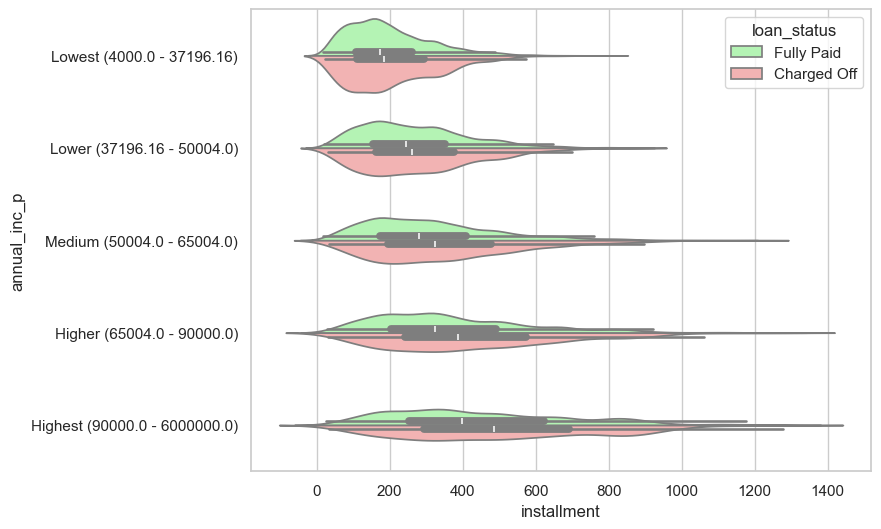

In [74]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()
#Observation: We can see the higher instalments for any income group have a greater number of loan defaults.

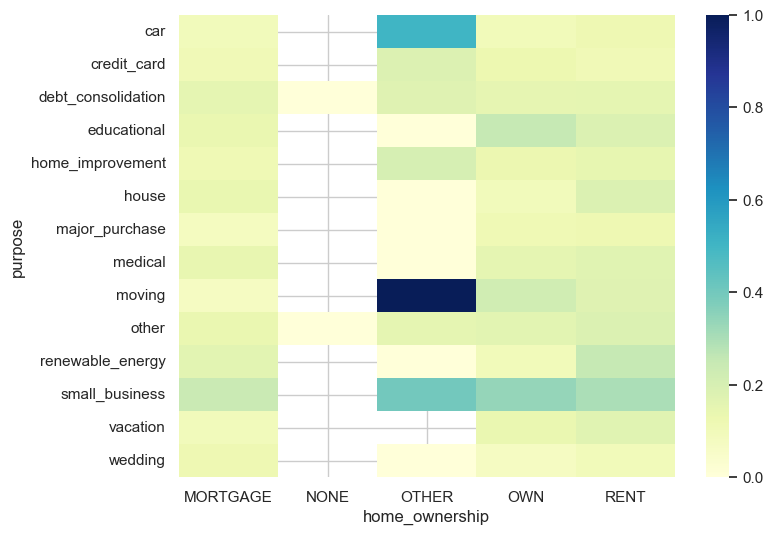

In [78]:
Bivariate_Categorical(x='home_ownership', y='purpose')
#Observation: We can see there is not much conculsion on dependancy on Home_ownership vs purpose on loan default

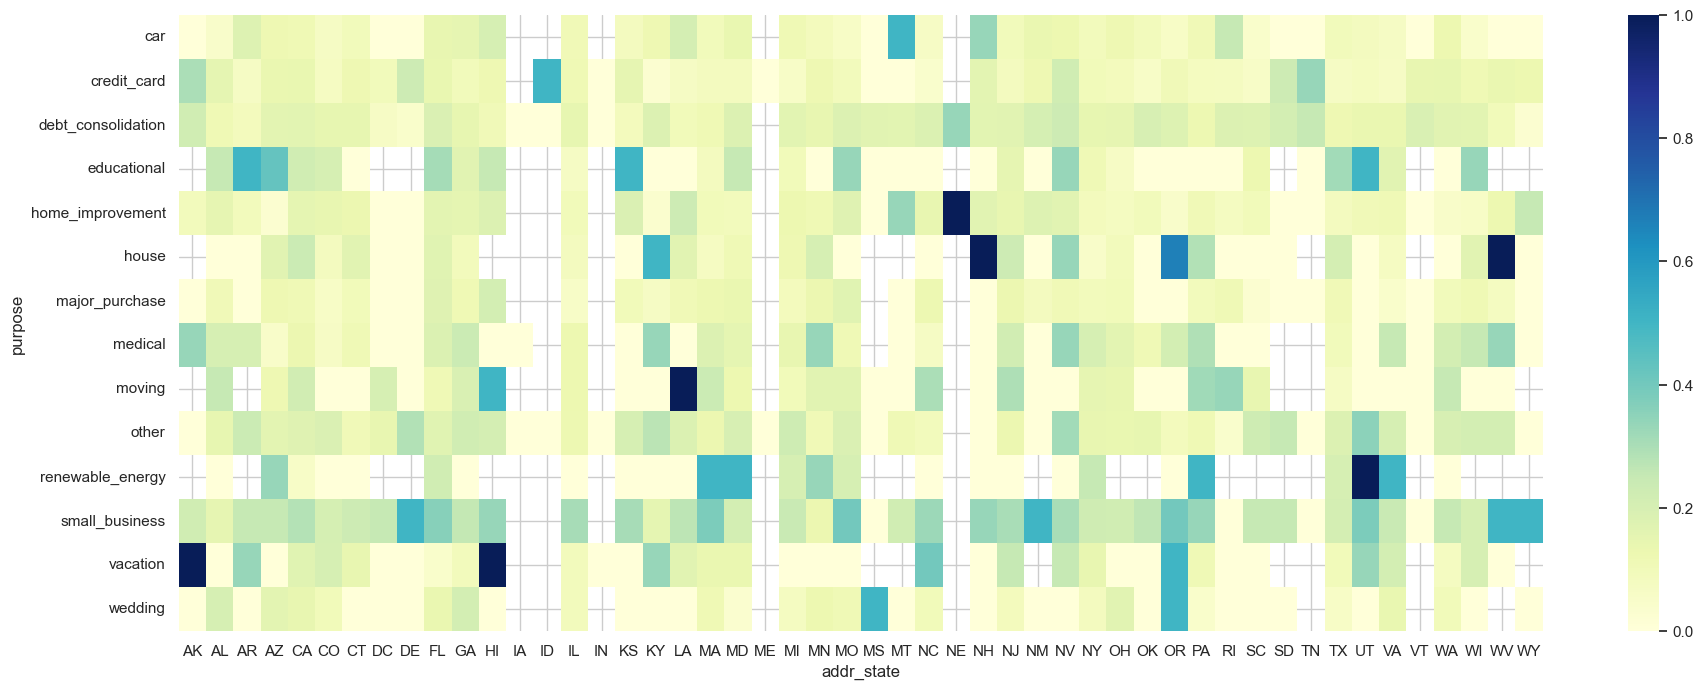

In [79]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))
#Observation: We observe that darker the intersection of addr_state has with the purpose of the loan, the greater is the chance of loan default.

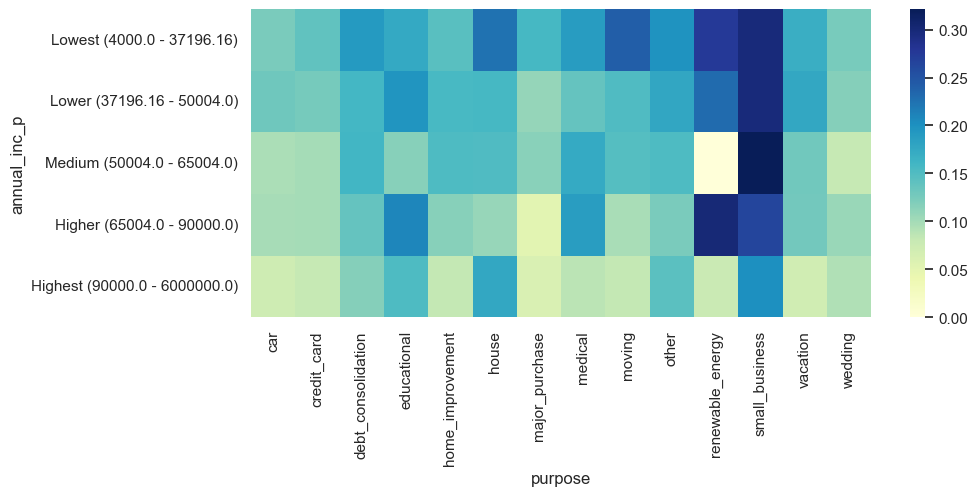

In [80]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))
#Observation:
# By comparing the annual income with loan purpose we observe that small business loans for lowest and medium income groups have high chances of loan default.
# Also renewable energy loans for higher income group show the same trend 

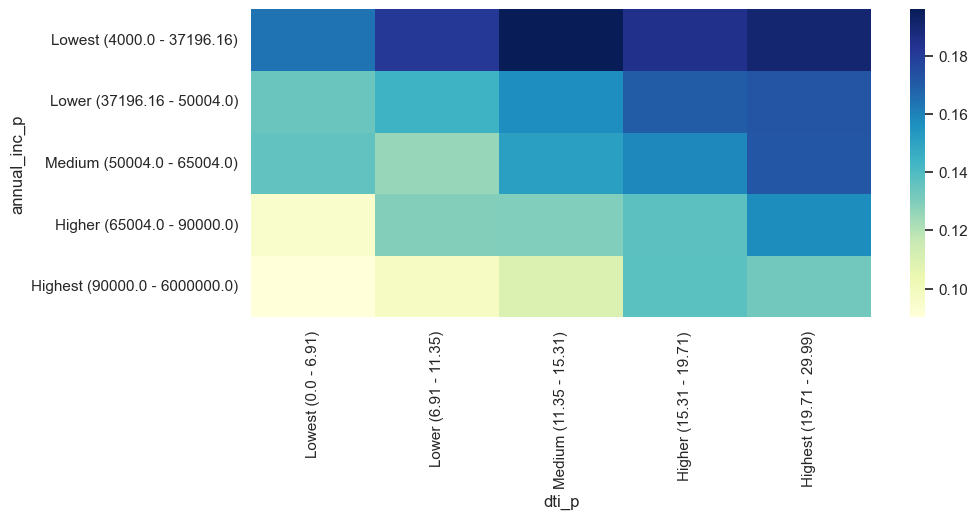

In [81]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))
#Observation:
# When we compare annual income with debt-to-income group, 
#we observe that medium debt-to-income group in the lowest income range shows high trend of loan default

LESSER IMPACT

In [82]:
# 1.  Lower annual income (below 37000)
# 2.  Higher loan amount (above 16000)
# 3.  Higher debt to income ratio (above 15%)
# 4.  Higher installment amount (above 327)
# 5.  Loan issue month (Dec, May)
# 6.  Applicant’s address state (NV, SD, AK, FL)

Higher IMPACT

In [83]:
# 1.  Higher interest rate (above 13%)
# 2.  Repayment term (5 years)
# 3.  Loan purpose (small business, renewable energy, educational)
# 4.  Higher revolving line utilization rate (above 58%)
# 5.  Loan grade & sub-grade (D to G)
# 6.  Public bankruptcy records (1 or 2)
# 7.  Derogatory public records (1 or 2)
# 8.  Missing employment record

With respect to the effects of combined attributes on the tendency of loan default, we have observed the following show higher combined impact

In [84]:
# 1. High loan amount and interest rate for lower income group
# 2. High installment and longer repayment term
# 3. Residential state and loan purpose
# 4. Income group and loan purpose
# 5. Home ownership (other) and loan purpose (car, moving or small business)